[View in Colaboratory](https://colab.research.google.com/github/ucalyptus/Spotify-Recommendation-Engine/blob/master/Spotify_Recommendation_System_.ipynb)

In [1]:
!pip install spotipy

Client ID ffbef2bcb4b84e80b3a0039a2906cb01

Client Secret 6c57daa1247f4abe96f38635d38869a0

Redirect URI https://developer.spotify.com/dashboard/applications/ffbef2bcb4b84e80b3a0039a2906cb01

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util

In [2]:
cid = 'ffbef2bcb4b84e80b3a0039a2906cb01'
secret = '6c57daa1247f4abe96f38635d38869a0'
username = '31fcf75braqovpjvblva32z3aq5e'
redirect_uri = 'https://developer.spotify.com/dashboard/applications/ffbef2bcb4b84e80b3a0039a2906cb01'


In [3]:
scope = 'user-library-read playlist-modify-public playlist-read-private'

client_credentials_manager = SpotifyClientCredentials(client_id = cid, client_secret=secret)

sp = spotipy.Spotify(client_credentials_manager= client_credentials_manager)

token = util.prompt_for_user_token(username,scope,cid,secret,redirect_uri)

if token:
  sp = spotipy.Spotify(auth=token)
  
else:
  print("Can't get token for", username)

In [5]:
import pandas as pd

#https://open.spotify.com/user/francocasadei/playlist/6aWL6tZgIycyz98WgigfsG
sourcePlaylistID = '6aWL6tZgIycyz98WgigfsG'
sourcePlaylist = sp.user_playlist(username,sourcePlaylistID);
tracks = sourcePlaylist["tracks"];
songs = tracks["items"];

track_ids = []
track_names = []


for i in range(0, len(songs)):
  if songs[i]['track']['id']!=None:
    track_ids.append(songs[i]['track']['id'])
    track_names.append(songs[i]['track']['name'])
    
features = []


for i in range(0,len(track_ids)):
  audio_features  = sp.audio_features(track_ids[i])
  for track in audio_features:
    features.append(track)
    
    
playlist_df = pd.DataFrame(features,index = track_names)

In [6]:
playlist_df = playlist_df[["id", "acousticness", "danceability", "duration_ms", "energy", "instrumentalness",  "key", "liveness", "loudness", "mode", "speechiness", "tempo", "valence"]]

In [7]:
playlist_df.shape

(26, 13)

In [8]:
playlist_df['ratings']=[(i*i)%11 for i in range(len(playlist_df))]

In [9]:
playlist_df

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,ratings
Losers,1bAvtmTl0F9loyz9AwPwp7,0.03550,0.666,281147,0.485,0.000599,0,0.5040,-9.850,0,0.0530,91.007,0.2870,0
Tell Your Friends,1mhVXWduD8ReDwusfaHNwU,0.26500,0.583,334333,0.454,0.000000,1,0.1810,-11.091,0,0.0425,74.640,0.3090,1
Often,4PhsKqMdgMEUSstTDAmMpg,0.22200,0.572,249040,0.631,0.000000,7,0.1350,-9.836,0,0.0476,134.078,0.0713,4
The Hills,7fBv7CLKzipRk6EC6TWHOB,0.06710,0.585,242253,0.564,0.000000,0,0.1350,-7.063,0,0.0515,113.003,0.1370,9
Acquainted,7uJH0YdSZL6psjxI6Xy08b,0.48200,0.372,348853,0.478,0.000000,7,0.0844,-9.835,0,0.0503,101.102,0.2540,5
Can't Feel My Face,22VdIZQfgXJea34mQxlt81,0.11300,0.705,213520,0.769,0.000000,9,0.1050,-5.526,0,0.0425,107.949,0.5830,3
Shameless,6C6fHTuFUxVtJpBOOaMvJr,0.14700,0.603,253507,0.563,0.000000,6,0.1090,-8.313,1,0.0270,100.060,0.2340,3
Earned It (Fifty Shades Of Grey),4frLb7nWtsz2ymBE6k2GRP,0.40500,0.659,277680,0.291,0.000000,2,0.0771,-8.275,0,0.0348,119.829,0.4060,5
In The Night,25KybV9BOUlvcnv7nN3Pyo,0.07960,0.505,235653,0.680,0.000000,7,0.0465,-4.993,1,0.0714,168.022,0.5390,9
As You Are,3H3qBumaYj67PT3aMEBvAP,0.13100,0.377,340493,0.329,0.006540,0,0.2790,-9.670,0,0.0569,173.663,0.0528,4


In [10]:
X_train = playlist_df.drop(['id', 'ratings'], axis=1)
y_train = playlist_df['ratings']

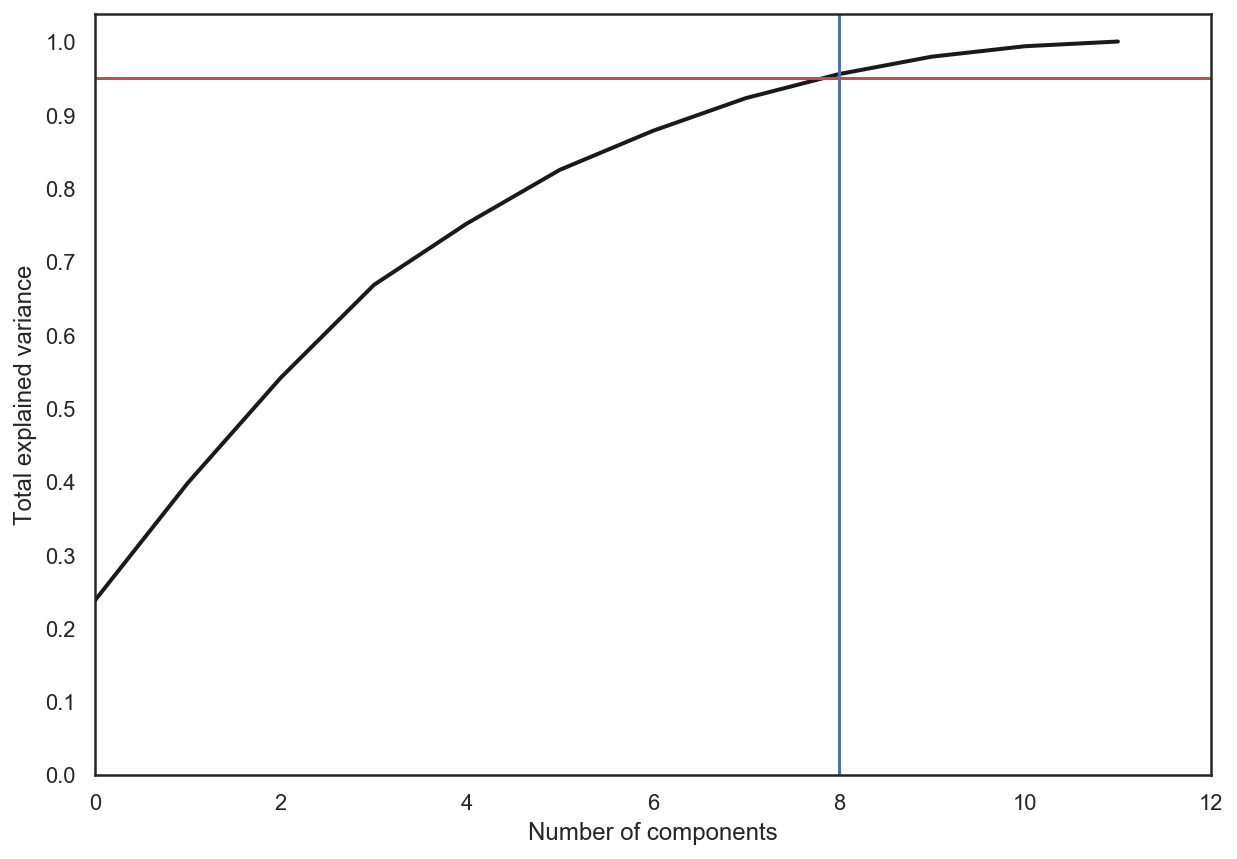

In [11]:
import numpy as np
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

X_scaled = StandardScaler().fit_transform(X_train)

pca = decomposition.PCA().fit(X_scaled)


plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='k',lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0,12)
plt.yticks(np.arange(0,1.1,0.1))
plt.axvline(8,c='b')
plt.axhline(0.95,c='r')
plt.show();

In [21]:
# Fit your dataset to the optimal pca
pca = decomposition.PCA(n_components=8)
X_pca = pca.fit_transform(X_scaled)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer(sublinear_tf = True, ngram_range=(1,6), max_features=10000)
X_names_sparse=v.fit_transform(track_names)
X_names_sparse.shape

(26, 126)

In [23]:
from scipy.sparse import csr_matrix, hstack

X_train_last = csr_matrix(hstack([X_pca, X_names_sparse]))

In [24]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

skf = StratifiedKFold(n_splits=2,shuffle=True,random_state=42)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn_params = {'n_neighbors':range(1,10)}
knn = KNeighborsClassifier(n_jobs=-1)

knn_grid= GridSearchCV(knn,knn_params,cv=skf,n_jobs =-1,verbose=True)
knn_grid.fit(X_train_last,y_train)
knn_grid.best_params_, knn_grid.best_score_

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  18 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.1s finished


({'n_neighbors': 2}, 0.23076923076923078)

In [26]:
from sklearn.ensemble import RandomForestClassifier
parameters = {'max_features':[4,7,8,10],'min_samples_leaf':[1,3,5,8],'max_depth':[3,5,8]}
rfc = RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=-1,oob_score=True)
forest_grid = GridSearchCV(rfc,parameters,n_jobs=-1,cv=skf,verbose=1)
forest_grid.fit(X_train_last,y_train)
forest_grid.best_estimator_ , forest_grid.best_score_

Fitting 2 folds for each of 48 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    3.8s finished


(RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=3, max_features=4,
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=-1, oob_score=True, random_state=42, verbose=0,
                        warm_start=False),
 0.3076923076923077)

In [27]:
from sklearn.tree import DecisionTreeClassifier

tree= DecisionTreeClassifier()

tree_params = {'max_depth':range(1,11),'max_features':range(4,19)}
tree_grid = GridSearchCV(tree,tree_params,cv=skf,n_jobs=-1,verbose=True)
tree_grid.fit(X_train_last,y_train)
tree_grid.best_estimator_ , tree_grid.best_score_

Fitting 2 folds for each of 150 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.3s finished


(DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=7, max_features=13, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 0.3076923076923077)

In [28]:
rec_tracks=[]

for i in playlist_df['id'].values.tolist():
  rec_tracks += sp.recommendations(seed_tracks=[i],limit = int(len(playlist_df)/2))['tracks'];
  

rec_track_ids=[]
rec_track_names = []
for i in rec_tracks:
  rec_track_ids.append(i['id'])
  rec_track_names.append(i['name'])
  

rec_features=[]

for i in range(0,len(rec_track_ids)):
  rec_audio_features = sp.audio_features(rec_track_ids[i])
  for track in rec_audio_features:
    rec_features.append(track)
    
    
rec_playlist_df= pd.DataFrame(rec_features,index = rec_track_ids)

In [29]:
rec_playlist_df = rec_playlist_df[["acousticness", "danceability", "duration_ms", "energy", "instrumentalness",  "key", "liveness", "loudness", "mode", "speechiness", "tempo", "valence"]]

In [30]:
tree_grid.best_estimator_.fit(X_train_last,y_train)
rec_playlist_df_scaled = StandardScaler().fit_transform(rec_playlist_df)
X_test_pca  = pca.transform(rec_playlist_df_scaled)
X_test_names = v.transform(rec_track_names)
X_test_last = csr_matrix(hstack([X_test_pca,X_test_names]))
y_pred_class = tree_grid.best_estimator_.predict(X_test_last)

In [31]:
rec_playlist_df['ratings']=y_pred_class
rec_playlist_df = rec_playlist_df.sort_values('ratings',ascending=False)
rec_playlist_df = rec_playlist_df.reset_index()

recs_to_add = rec_playlist_df[rec_playlist_df['ratings']>=9]['index'].values.tolist()

In [32]:
playlist_recs =sp.user_playlist_create(username,name='P24 Recommended Songs')

In [33]:
playlist_recs

{'collaborative': False,
 'description': '',
 'external_urls': {'spotify': 'https://open.spotify.com/playlist/0mDrCHfvSOaD8pmelYIoPs'},
 'followers': {'href': None, 'total': 0},
 'href': 'https://api.spotify.com/v1/playlists/0mDrCHfvSOaD8pmelYIoPs',
 'id': '0mDrCHfvSOaD8pmelYIoPs',
 'images': [],
 'name': 'P24 Recommended Songs',
 'owner': {'display_name': 'Ankush Grover',
  'external_urls': {'spotify': 'https://open.spotify.com/user/31fcf75braqovpjvblva32z3aq5e'},
  'href': 'https://api.spotify.com/v1/users/31fcf75braqovpjvblva32z3aq5e',
  'id': '31fcf75braqovpjvblva32z3aq5e',
  'type': 'user',
  'uri': 'spotify:user:31fcf75braqovpjvblva32z3aq5e'},
 'primary_color': None,
 'public': True,
 'snapshot_id': 'MSw4Yzk1NjA3YWNiNjZhZWJmMDg2MjI2MTFlMDhiNjdiMWEyMmE5MDc3',
 'tracks': {'href': 'https://api.spotify.com/v1/playlists/0mDrCHfvSOaD8pmelYIoPs/tracks',
  'items': [],
  'limit': 100,
  'next': None,
  'offset': 0,
  'previous': None,
  'total': 0},
 'type': 'playlist',
 'uri': 'spotify:

In [34]:
if len(recs_to_add)>100:
    recs_to_add = recs_to_add[:100]

In [35]:
sp.user_playlist_add_tracks(username,playlist_recs['id'],recs_to_add);

In [36]:
len(recs_to_add)

18